In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [10]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

presentation_period= 0.35 #stim presnetation time
presentation_period_cue=  0.50 #presentation of attentional cue time
pre_stim_period= 0.5 #time between cue and stim
resp_time = 4  #time the response is active




In [ ]:
# Functions
def boots_by_subj(data, col_int, col_subj, n_iterations, alpha, stat):
    #### you give a 2 column df, one column qith the value and the other column with subject index:
    list_subjects = data[col_subj].unique()
    sample=[]
    for n in range(n_iterations):
        resampled=[]
        new_sample = list(np.random.randint(0, len(list_subjects), len(list_subjects)))
        for res_s in new_sample:
            resampled = resampled + list(data.loc[data[col_subj]==list_subjects[res_s], col_int].values) 
        #
        sample.append(stat(resampled))
    #
    stats_sorted = np.sort(sample)
    new_mean=np.mean(sample)
    return (new_mean, stats_sorted[int((alpha/2.0)*n_iterations)],
            stats_sorted[int((1-alpha/2.0)*n_iterations)])




def line_significance(timepoints, ci_inf, ci_sup, y_min_shad, y_max_shad, color_sh):
    for idx_t in range(  len(timepoints)-1 ):
        #if ci_inf[idx_t]<= 0 <= ci_sup[idx_t]:    #### inferior and superior
        #    plt.fill_between(  [timepoints[idx_t], timepoints[idx_t+1] ], [y_min_shad, y_min_shad], [y_max_shad, y_max_shad], color='w', alpha=0.3)
        
        if ci_inf[idx_t]<= 0 : ### just superior
            plt.fill_between(  [timepoints[idx_t], timepoints[idx_t+1] ], [y_min_shad, y_min_shad], [y_max_shad, y_max_shad], color='w', alpha=0.3)
        
        else:
            plt.fill_between(  [timepoints[idx_t], timepoints[idx_t+1] ], [y_min_shad, y_min_shad], [y_max_shad, y_max_shad], color=color_sh, alpha=0.3)



#

#

def plot_decoding(df_plot):
    ##
    ###
    ####   In the input dataframe you need the following columns:
    ###  'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition'
    ## 
    pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
    ##
    fig = plt.figure(figsize=(10,8))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [0, 27]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [0, 35]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        #ax = sns.lineplot(x='times', y='decoding',  color = 'black', data=n) #figure to get the intervals of shuffle
        #ax.lines[0].set_linestyle("--")
        data_cond =  df_plot.loc[ (df_plot['condition']==condition)]
        sns.lineplot( ax=ax, x="time", y="new_mean", hue='brain_reg', hue_order =  ['visual', 'ips', 'frontinf'], ci=None, palette=pal, data=data_cond) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['brain_reg']=='visual', 'inf']) , list(data_cond.loc[data_cond['brain_reg']=='visual', 'sup']) , color=pal[0], alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['brain_reg']=='ips', 'inf']) , list(data_cond.loc[data_cond['brain_reg']=='ips', 'sup']) , color=pal[1], alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['brain_reg']=='frontinf', 'inf']) , list(data_cond.loc[data_cond['brain_reg']=='frontinf', 'sup']) , color=pal[2], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #sns.lineplot( ax=ax, x="times", y="decoding", hue='region', hue_order =  ['visual', 'ips', 'frontinf'],  ci=95, palette=pal, data=dfsn.loc[ (dfsn['condition']==condition)]) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'

        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

        ## Plot the significance line
        for index_color, brain_reg in enumerate(['visual', 'ips', 'frontinf']):
            all_timepoints = list( data_cond.loc[data_cond['brain_reg']==brain_reg].time )
            conf_inf = list( data_cond.loc[data_cond['brain_reg']==brain_reg].inf )
            conf_sup = list( data_cond.loc[data_cond['brain_reg']==brain_reg].sup )
            color_sign = pal[index_color]
            y_min_shad = -5 - index_color
            y_max_shad = -6 - index_color
            line_significance(all_timepoints, conf_inf, conf_sup, y_min_shad, y_max_shad, color_sh=color_sign)
        #
        ###
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.yticks([-4, 0 , 4])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(loc= 2, frameon=False)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( '', fontsize=18) ## main title
    plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    

    
#####



## Target

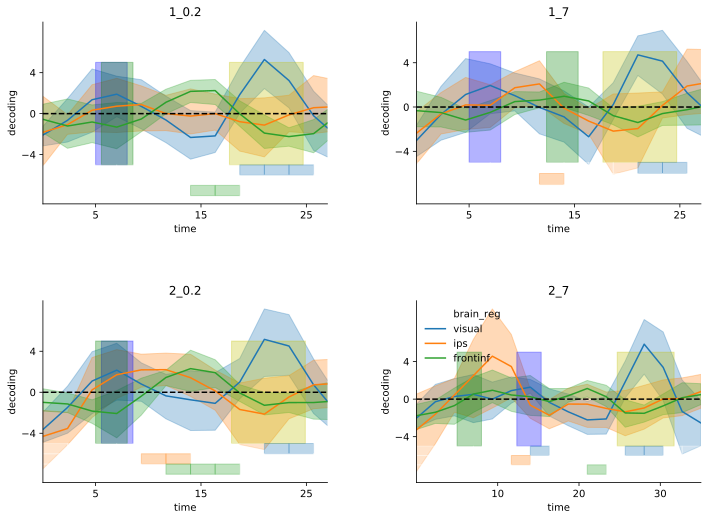

In [17]:
path_save_signal ='C:\\Users\\David\\Desktop\\signal_LM.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\shuff_LM.xlsx'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)
df_t = pd.concat([Df, Df_shuff]) #concatenate the files


##### Measure of difference to shuffle (decoding value)
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: #['visual', 'ips', 'pfc']: ['front_sup', 'front_mid', 'front_inf']
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_t.subject.unique():
            #decode_timepoint = []
            for times in df_t.times.unique():    
                values = df_t.loc[(df_t['label']=='shuffle') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## all shuffled reconstructions
                values_boot = df_t.loc[(df_t['label']=='signal') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## bootstrap reconstructions
                for n_boot in range(0, len(values_boot)): ##trial base
                    #### zscore method
                    prediction = (values_boot.iloc[n_boot] - np.mean(values)) / np.std(values)
                    subj_decoding.append([prediction, times, subject, brain_region, condition])


#
dft = pd.DataFrame(subj_decoding) 
dft.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle

#### df needed for the plot (you do the bootstrap by subj, so it ca not be done with seaborn)
#### get the inf and superior of the bootstrap by doing a bootstrap by subject (not using the ci of the sns.lineplot)
df_plot = []
for brain_reg in ['visual', 'ips', 'frontinf']:
    for time in list(dft.times.unique()) :
        for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
            data = dft.loc[(dft['condition']==condition) & (dft['times']==time) & (dft['region']==brain_reg), ['decoding', 'subject'] ]
            old_mean = data.decoding.mean()
            new_mean, inf_l, sup_l = boots_by_subj(data, 'decoding', 'subject', 1000, 0.05, np.mean)
            df_plot.append( [old_mean, new_mean, inf_l, sup_l, brain_reg, time, condition])


#
df_plot_t = pd.DataFrame(df_plot) 
df_plot_t.columns=[ 'old_mean', 'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition' ] #decode compared to shuffle

##
plot_decoding(df_plot_t)

## Distractor

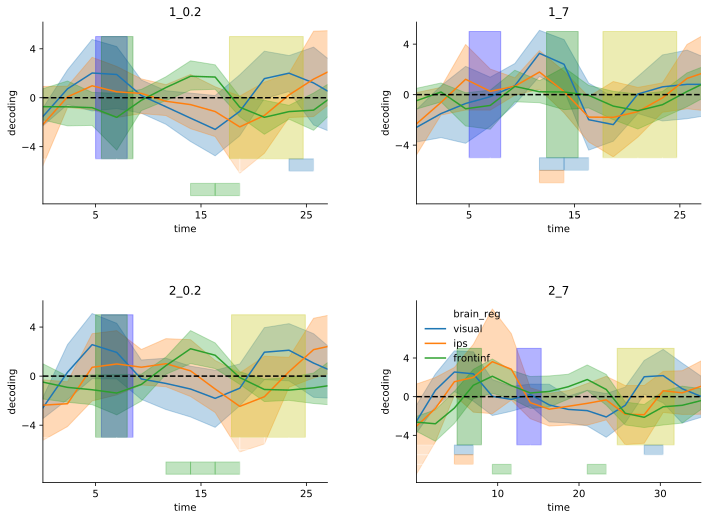

In [18]:
path_save_signal ='C:\\Users\\David\\Desktop\\signal_LM_dist.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\shuff_LM_dist.xlsx'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)
df_d = pd.concat([Df, Df_shuff]) #concatenate the files


##### Measure of difference to shuffle (decoding value)
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: 
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_d.subject.unique():
            #decode_timepoint = []
            for times in df_d.times.unique():    
                values = df_d.loc[(df_d['label']=='shuffle') & (df_d['condition']==condition) & (df_d['region'] ==brain_region)  & (df_d['subject'] ==subject) & (df_d['times']==times), 'decoding'] ## all shuffled reconstructions
                values_boot = df_d.loc[(df_d['label']=='signal') & (df_d['condition']==condition) & (df_d['region'] ==brain_region)  & (df_d['subject'] ==subject) & (df_d['times']==times), 'decoding'] ## bootstrap reconstructions
                for n_boot in range(0, len(values_boot)): ##trial base
                    #### zscore method
                    prediction = (values_boot.iloc[n_boot] - np.mean(values)) / np.std(values)
                    subj_decoding.append([prediction, times, subject, brain_region, condition])


#
dfd = pd.DataFrame(subj_decoding) 
dfd.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle

#### df needed for the plot (you do the bootstrap by subj, so it ca not be done with seaborn)
#### get the inf and superior of the bootstrap by doing a bootstrap by subject (not using the ci of the sns.lineplot)
df_plot = []
for brain_reg in ['visual', 'ips', 'frontinf']:
    for time in list(dfd.times.unique()) :
        for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
            data = dfd.loc[(dfd['condition']==condition) & (dfd['times']==time) & (dfd['region']==brain_reg), ['decoding', 'subject'] ]
            old_mean = data.decoding.mean()
            new_mean, inf_l, sup_l = boots_by_subj(data, 'decoding', 'subject', 1000, 0.05, np.mean)
            df_plot.append( [old_mean, new_mean, inf_l, sup_l, brain_reg, time, condition])


#
df_plot_d = pd.DataFrame(df_plot) 
df_plot_d.columns=[ 'old_mean', 'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition' ] #decode compared to shuffle

##
plot_decoding(df_plot_d)

## Response

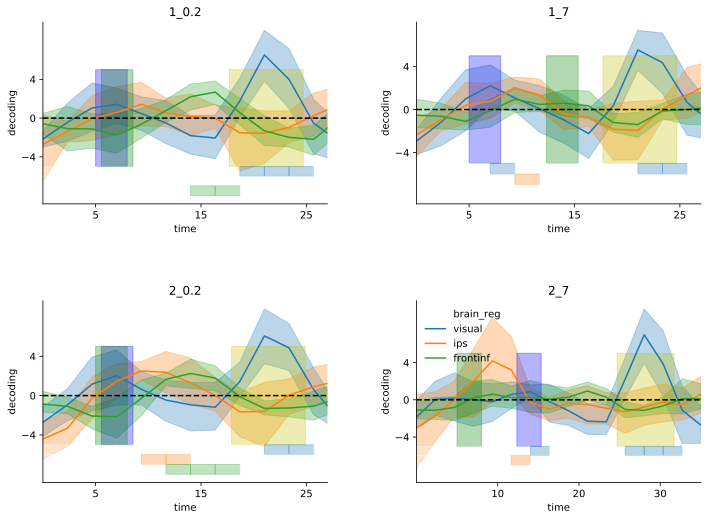

In [19]:
path_save_signal ='C:\\Users\\David\\Desktop\\signal_LM_response.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\shuff_LM_response.xlsx'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)
df_r = pd.concat([Df, Df_shuff]) #concatenate the files


##### Measure of difference to shuffle (decoding value)
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: 
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_r.subject.unique():
            #decode_timepoint = []
            for times in df_r.times.unique():    
                values = df_r.loc[(df_r['label']=='shuffle') & (df_r['condition']==condition) & (df_r['region'] ==brain_region)  & (df_r['subject'] ==subject) & (df_r['times']==times), 'decoding'] ## all shuffled reconstructions
                values_boot = df_r.loc[(df_r['label']=='signal') & (df_r['condition']==condition) & (df_r['region'] ==brain_region)  & (df_r['subject'] ==subject) & (df_r['times']==times), 'decoding'] ## bootstrap reconstructions
                for n_boot in range(0, len(values_boot)): ##trial base
                    #### zscore method
                    prediction = (values_boot.iloc[n_boot] - np.mean(values)) / np.std(values)
                    subj_decoding.append([prediction, times, subject, brain_region, condition])


#
dfr = pd.DataFrame(subj_decoding) 
dfr.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle

#### df needed for the plot (you do the bootstrap by subj, so it ca not be done with seaborn)
#### get the inf and superior of the bootstrap by doing a bootstrap by subject (not using the ci of the sns.lineplot)
df_plot = []
for brain_reg in ['visual', 'ips', 'frontinf']:
    for time in list(dfd.times.unique()) :
        for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
            data = dfr.loc[(dfr['condition']==condition) & (dfr['times']==time) & (dfr['region']==brain_reg), ['decoding', 'subject'] ]
            old_mean = data.decoding.mean()
            new_mean, inf_l, sup_l = boots_by_subj(data, 'decoding', 'subject', 1000, 0.05, np.mean)
            df_plot.append( [old_mean, new_mean, inf_l, sup_l, brain_reg, time, condition])


#
df_plot_r = pd.DataFrame(df_plot) 
df_plot_r.columns=[ 'old_mean', 'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition' ] #decode compared to shuffle

##
plot_decoding(df_plot_r)

In [20]:
df_plot_t['decode']='target'
df_plot_d['decode']='distractor'
df_plot_r['decode']='response'

df_td = pd.concat([df_plot_t, df_plot_d])

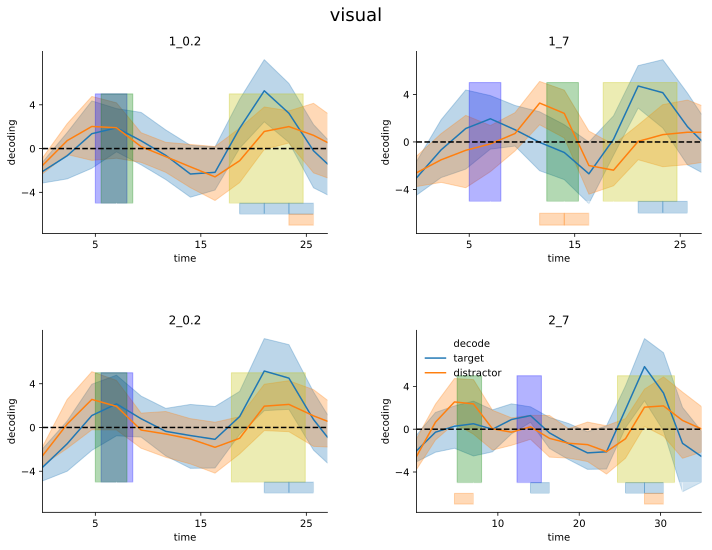

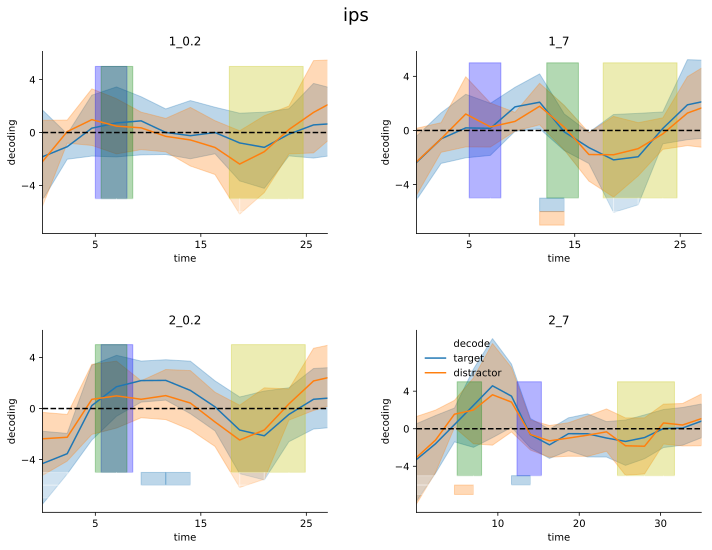

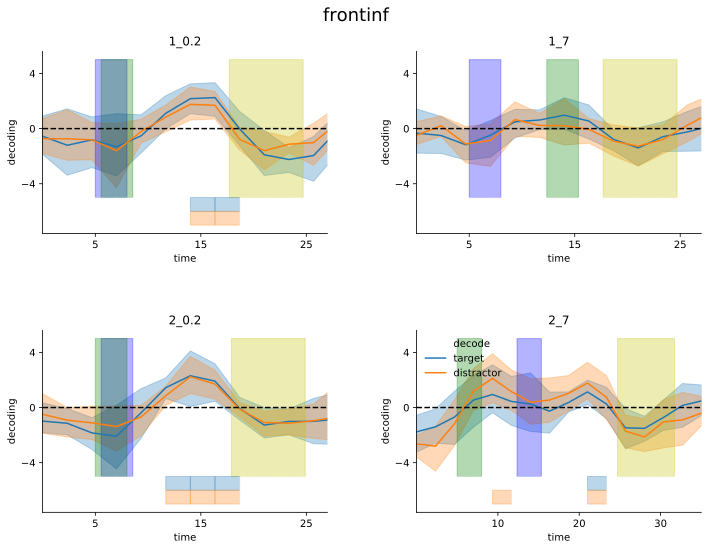

In [41]:
pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:2]

for Brain_region in ['visual', 'ips', 'frontinf']:
    fig = plt.figure(figsize=(10,8))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [0, 27]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [0, 35]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        #ax = sns.lineplot(x='times', y='decoding',  color = 'black', data=n) #figure to get the intervals of shuffle
        #ax.lines[0].set_linestyle("--")
        data_cond =  df_td.loc[ (df_td['condition']==condition) & (df_td['brain_reg']==Brain_region)]
        sns.lineplot( ax=ax, x="time", y="new_mean", hue='decode', hue_order =  ['target', 'distractor'], ci=None, palette=pal, data=data_cond) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='target', 'inf']) , list(data_cond.loc[data_cond['decode']=='target', 'sup']) , color=pal[0], alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='distractor', 'inf']) , list(data_cond.loc[data_cond['decode']=='distractor', 'sup']) , color=pal[1], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='response', 'inf']) , list(data_cond.loc[data_cond['decode']=='response', 'sup']) , color=pal[2], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #sns.lineplot( ax=ax, x="times", y="decoding", hue='region', hue_order =  ['visual', 'ips', 'frontinf'],  ci=95, palette=pal, data=dfsn.loc[ (dfsn['condition']==condition)]) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'

        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

        ## Plot the significance line
        for index_color, decode_reg in enumerate(['target', 'distractor']):
            all_timepoints = list( data_cond.loc[data_cond['decode']==decode_reg].time )
            conf_inf = list( data_cond.loc[data_cond['decode']==decode_reg].inf )
            conf_sup = list( data_cond.loc[data_cond['decode']==decode_reg].sup )
            color_sign = pal[index_color]
            y_min_shad = -5 - index_color
            y_max_shad = -6 - index_color
            line_significance(all_timepoints, conf_inf, conf_sup, y_min_shad, y_max_shad, color_sh=color_sign)
        #
        ###
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.yticks([-4, 0 , 4])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(loc= 2, frameon=False)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( Brain_region, fontsize=18) ## main title
    plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    

## Close (target and distractor)

In [ ]:
#Target_close
path_ox = 'C:\\Users\\David\\Desktop\\close\\boots_LM_response_boot_close_ox.xlsx'
path_nit = 'C:\\Users\\David\\Desktop\\close\\boots_LM_response_boot_close_nit.xlsx'
path_hid = 'C:\\Users\\David\\Desktop\\close\\boots_LM_response_boot_close_hid.xlsx'

path_ox_shuffle = 'C:\\Users\\David\\Desktop\\close\\shuff_LM_response_boot_close_ox.xlsx'
path_nit_shuffle = 'C:\\Users\\David\\Desktop\\close\\shuff_LM_response_boot_close_nit.xlsx'
path_hid_shuffle = 'C:\\Users\\David\\Desktop\\close\\shuff_LM_response_boot_close_hid.xlsx'

df_ox = pd.read_excel(path_ox)
df_nit = pd.read_excel(path_nit)
df_hid = pd.read_excel(path_hid)

shuff_ox = pd.read_excel(path_ox_shuffle)
shuff_nit = pd.read_excel(path_nit_shuffle)
shuff_hid = pd.read_excel(path_hid_shuffle)

Df = pd.concat([df_ox, df_nit, df_hid], ignore_index=True)
Df_shuff = pd.concat([shuff_ox, shuff_nit, shuff_hid], ignore_index=True)

df_t = pd.concat([Df, Df_shuff]) #concatenate the files

##### Measure of difference to shuffle (decoding value)
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: #['visual', 'ips', 'pfc']: ['front_sup', 'front_mid', 'front_inf']
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_t.subject.unique():
            #decode_timepoint = []
            for times in df_t.times.unique():    
                values = df_t.loc[(df_t['label']=='shuffle') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## all shuffled reconstructions
                values_boot = df_t.loc[(df_t['label']=='boots') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## bootstrap reconstructions
                for n_boot in range(0, len(values_boot)): ##trial base
                    #### zscore method
                    prediction = (values_boot.iloc[n_boot] - np.mean(values)) / np.std(values)
                    subj_decoding.append([prediction, times, subject, brain_region, condition])


#
dft = pd.DataFrame(subj_decoding) 
dft.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle

#### df needed for the plot (you do the bootstrap by subj, so it ca not be done with seaborn)
#### get the inf and superior of the bootstrap by doing a bootstrap by subject (not using the ci of the sns.lineplot)
df_plot = []
for brain_reg in ['visual', 'ips', 'frontinf']:
    for time in list(dft.times.unique()) :
        for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
            data = dft.loc[(dft['condition']==condition) & (dft['times']==time) & (dft['region']==brain_reg), ['decoding', 'subject'] ]
            old_mean = data.decoding.mean()
            new_mean, inf_l, sup_l = boots_by_subj(data, 'decoding', 'subject', 1000, 0.05, np.mean)
            df_plot.append( [old_mean, new_mean, inf_l, sup_l, brain_reg, time, condition])


#
df_plot_tc = pd.DataFrame(df_plot) 
df_plot_tc.columns=[ 'old_mean', 'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition' ] #decode compared to shuffle

##
plot_decoding(df_plot_tc)

In [ ]:
plot_decoding(df_plot_tc)

In [ ]:
#Distractor_close
path_ox = 'C:\\Users\\David\\Desktop\\dist_close\\boots_LM_dist_boot_close_ox.xlsx'
path_nit = 'C:\\Users\\David\\Desktop\\dist_close\\boots_LM_dist_boot_close_nit.xlsx'
path_hid = 'C:\\Users\\David\\Desktop\\dist_close\\boots_LM_dist_boot_close_hid.xlsx'

path_ox_shuffle = 'C:\\Users\\David\\Desktop\\dist_close\\shuff_LM_dist_boot_close_ox.xlsx'
path_nit_shuffle = 'C:\\Users\\David\\Desktop\\dist_close\\shuff_LM_dist_boot_close_nit.xlsx'
path_hid_shuffle = 'C:\\Users\\David\\Desktop\\dist_close\\shuff_LM_dist_boot_close_hid.xlsx'


df_ox = pd.read_excel(path_ox)
df_nit = pd.read_excel(path_nit)
df_hid = pd.read_excel(path_hid)

shuff_ox = pd.read_excel(path_ox_shuffle)
shuff_nit = pd.read_excel(path_nit_shuffle)
shuff_hid = pd.read_excel(path_hid_shuffle)

Df = pd.concat([df_ox, df_nit, df_hid], ignore_index=True)
Df_shuff = pd.concat([shuff_ox, shuff_nit, shuff_hid], ignore_index=True)
df_d = pd.concat([Df, Df_shuff]) #concatenate the files


##### Measure of difference to shuffle (decoding value)
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: 
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_d.subject.unique():
            #decode_timepoint = []
            for times in df_d.times.unique():    
                values = df_d.loc[(df_d['label']=='shuffle') & (df_d['condition']==condition) & (df_d['region'] ==brain_region)  & (df_d['subject'] ==subject) & (df_d['times']==times), 'decoding'] ## all shuffled reconstructions
                values_boot = df_d.loc[(df_d['label']=='boots') & (df_d['condition']==condition) & (df_d['region'] ==brain_region)  & (df_d['subject'] ==subject) & (df_d['times']==times), 'decoding'] ## bootstrap reconstructions
                for n_boot in range(0, len(values_boot)): ##trial base
                    #### zscore method
                    prediction = (values_boot.iloc[n_boot] - np.mean(values)) / np.std(values)
                    subj_decoding.append([prediction, times, subject, brain_region, condition])


#
dfd = pd.DataFrame(subj_decoding) 
dfd.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle

#### df needed for the plot (you do the bootstrap by subj, so it ca not be done with seaborn)
#### get the inf and superior of the bootstrap by doing a bootstrap by subject (not using the ci of the sns.lineplot)
df_plot = []
for brain_reg in ['visual', 'ips', 'frontinf']:
    for time in list(dfd.times.unique()) :
        for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:
            data = dfd.loc[(dfd['condition']==condition) & (dfd['times']==time) & (dfd['region']==brain_reg), ['decoding', 'subject'] ]
            old_mean = data.decoding.mean()
            new_mean, inf_l, sup_l = boots_by_subj(data, 'decoding', 'subject', 1000, 0.05, np.mean)
            df_plot.append( [old_mean, new_mean, inf_l, sup_l, brain_reg, time, condition])


#
df_plot_dc = pd.DataFrame(df_plot) 
df_plot_dc.columns=[ 'old_mean', 'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition' ] #decode compared to shuffle

##
plot_decoding(df_plot_dc)

In [ ]:
df_plot_tc['decode']='target'
df_plot_dc['decode']='distractor'

df_tdc = pd.concat([df_plot_tc, df_plot_dc])

pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:2]

for Brain_region in ['visual', 'ips', 'frontinf']:
    fig = plt.figure(figsize=(10,8))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [0, 27]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [0, 27]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [0, 35]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        #ax = sns.lineplot(x='times', y='decoding',  color = 'black', data=n) #figure to get the intervals of shuffle
        #ax.lines[0].set_linestyle("--")
        data_cond =  df_td.loc[ (df_td['condition']==condition) & (df_td['brain_reg']==Brain_region)]
        sns.lineplot( ax=ax, x="time", y="new_mean", hue='decode', hue_order =  ['target', 'distractor'], ci=None, palette=pal, data=data_cond) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='target', 'inf']) , list(data_cond.loc[data_cond['decode']=='target', 'sup']) , color=pal[0], alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='distractor', 'inf']) , list(data_cond.loc[data_cond['decode']=='distractor', 'sup']) , color=pal[1], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #plt.fill_between(  list(data_cond.time.unique()) , list(data_cond.loc[data_cond['decode']=='response', 'inf']) , list(data_cond.loc[data_cond['decode']=='response', 'sup']) , color=pal[2], alpha=0.3) #, label='target'  ) #plot aprox time of target
        #sns.lineplot( ax=ax, x="times", y="decoding", hue='region', hue_order =  ['visual', 'ips', 'frontinf'],  ci=95, palette=pal, data=dfsn.loc[ (dfsn['condition']==condition)]) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'

        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

        ## Plot the significance line
        for index_color, decode_reg in enumerate(['target', 'distractor']):
            all_timepoints = list( data_cond.loc[data_cond['decode']==decode_reg].time )
            conf_inf = list( data_cond.loc[data_cond['decode']==decode_reg].inf )
            conf_sup = list( data_cond.loc[data_cond['decode']==decode_reg].sup )
            color_sign = pal[index_color]
            y_min_shad = -5 - index_color
            y_max_shad = -6 - index_color
            line_significance(all_timepoints, conf_inf, conf_sup, y_min_shad, y_max_shad, color_sh=color_sign)
        #
        ###
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.yticks([-4, 0 , 4])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(loc= 2, frameon=False)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( Brain_region, fontsize=18) ## main title
    plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
